In [1]:
import re
import numpy as np
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import optimize
import scipy.stats as st
from numpy import random
from scipy.stats import chi2
%matplotlib inline

In [43]:
with open('cats.txt', 'r') as f:
    read_data = f.read()
read_data = read_data.lower()

In [44]:
read_data = re.split('[^a-z]', read_data)
read_data = [x for x in read_data if x]
read_data

['in',
 'comparison',
 'to',
 'dogs',
 'cats',
 'have',
 'not',
 'undergone',
 'major',
 'changes',
 'during',
 'the',
 'domestication',
 'process',
 'as',
 'cat',
 'simply',
 'catenates',
 'streams',
 'of',
 'bytes',
 'it',
 'can',
 'be',
 'also',
 'used',
 'to',
 'concatenate',
 'binary',
 'files',
 'where',
 'it',
 'will',
 'just',
 'concatenate',
 'sequence',
 'of',
 'bytes',
 'a',
 'common',
 'interactive',
 'use',
 'of',
 'cat',
 'for',
 'a',
 'single',
 'file',
 'is',
 'to',
 'output',
 'the',
 'content',
 'of',
 'a',
 'file',
 'to',
 'standard',
 'output',
 'cats',
 'can',
 'hear',
 'sounds',
 'too',
 'faint',
 'or',
 'too',
 'high',
 'in',
 'frequency',
 'for',
 'human',
 'ears',
 'such',
 'as',
 'those',
 'made',
 'by',
 'mice',
 'and',
 'other',
 'small',
 'animals',
 'in',
 'one',
 'people',
 'deliberately',
 'tamed',
 'cats',
 'in',
 'a',
 'process',
 'of',
 'artificial',
 'selection',
 'as',
 'they',
 'were',
 'useful',
 'predators',
 'of',
 'vermin',
 'the',
 'domesticat

In [45]:
read_data = dict(zip(set(read_data),range(len(set(read_data)))))
read_data

{'from': 0,
 'weighing': 1,
 'lb': 2,
 'that': 3,
 'tamed': 4,
 'may': 5,
 'an': 6,
 'external': 7,
 'sounds': 8,
 'such': 9,
 'apple': 10,
 'chromosomes': 11,
 'interactive': 12,
 'commands': 13,
 'connected': 14,
 'than': 15,
 'stdin': 16,
 'animals': 17,
 'legibility': 18,
 'releases': 19,
 'two': 20,
 'new': 21,
 'time': 22,
 'july': 23,
 'terms': 24,
 'computers': 25,
 'keyboards': 26,
 'you': 27,
 'information': 28,
 'basic': 29,
 'mac': 30,
 'most': 31,
 'create': 32,
 'fifth': 33,
 'closest': 34,
 'successor': 35,
 'instead': 36,
 'wrong': 37,
 'mavericks': 38,
 'by': 39,
 'members': 40,
 'type': 41,
 'command': 42,
 'since': 43,
 'without': 44,
 'every': 45,
 'a': 46,
 'installed': 47,
 'symbols': 48,
 'often': 49,
 'receives': 50,
 'to': 51,
 'installs': 52,
 'not': 53,
 'second': 54,
 'incremental': 55,
 'typically': 56,
 'upgrade': 57,
 'so': 58,
 'through': 59,
 'need': 60,
 'app': 61,
 'output': 62,
 'mid': 63,
 'needing': 64,
 'offered': 65,
 'redirection': 66,
 'some': 

In [54]:
matrix = np.zeros((22,254))
with open('cats.txt', 'r') as f:
    counter = 0
    for line in f:
        line = line.lower()
        line = re.split('[^a-z]', line)
        line = [x for x in line if x]
        for word in line:
            matrix[counter,read_data[word]]+=1
        counter+=1
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [61]:
l = []
for i in range(matrix.shape[0]):
    l.append(spatial.distance.cosine(matrix[0,:],matrix[i,:]))
l1 = l.sort()
l

[0.0,
 0.9527544408738466,
 0.8644738145642124,
 0.8951715163278082,
 0.7770887149698589,
 0.9402385695332803,
 0.7327387580875756,
 0.9258750683338899,
 0.8842724875284311,
 0.9055088817476932,
 0.8328165362273942,
 0.8804771390665607,
 0.8396432548525454,
 0.8703592552895671,
 0.8740118423302576,
 0.9442721787424647,
 0.8406361854220809,
 0.956644501523794,
 0.9442721787424647,
 0.8885443574849294,
 0.8427572744917122,
 0.8250364469440588]

In [2]:
def f(x):
    return (np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.))

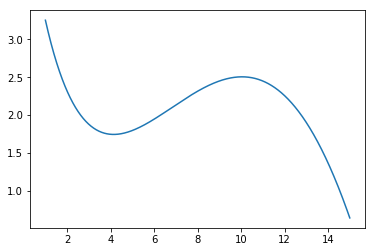

In [67]:
plt.plot(np.arange(1,15,0.01),f(np.arange(1,15,0.01)))
plt.show()

In [92]:
A = [[1,1,1,1],
     [1,4,4**2,4**3],
     [1,10,10**2,10**3],
     [1,15,15**2,15**3]]
b = [f(1),f(4),f(10),f(15)]

In [93]:
w = linalg.solve(A,b)
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [94]:
ext_X = np.ones((len(np.arange(1,15,0.01)),4))
ext_X[:,1] = np.arange(1,15,0.01)
ext_X[:,2] = np.power(ext_X[:,1],2)
ext_X[:,3] = np.power(ext_X[:,1],3)

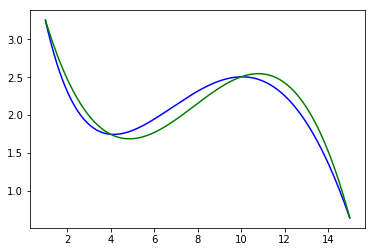

In [95]:
plt.plot(np.arange(1,15,0.01),f(np.arange(1,15,0.01)),color='blue')#,np.arange(1,15,0.01),np.dot(ext_X,w.T),color='green')
plt.plot(np.arange(1,15,0.01),np.dot(ext_X,w.T),color='green')
plt.show()

# 2nd dz

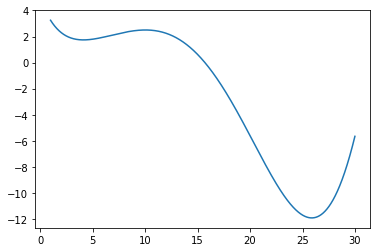

In [3]:
plt.plot(np.arange(1,30,0.01),f(np.arange(1,30,0.01)))
plt.show()

In [9]:
scipy.optimize.minimize(f,20)
#min -11.89889

      fun: -11.898894665971952
 hess_inv: array([[1.68469947]])
      jac: array([-3.33786011e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([25.88018742])

In [13]:
scipy.optimize.minimize(f,30,method='BFGS')

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])

In [14]:
scipy.optimize.differential_evolution(f,[(0,30)])

     fun: array([-11.89889467])
     jac: array([1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 128
     nit: 7
 success: True
       x: array([25.88019324])

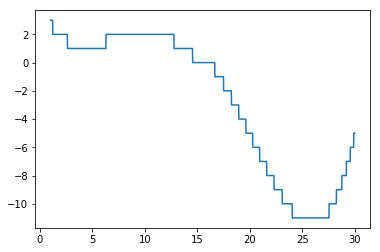

In [16]:
plt.plot(np.arange(1,30,0.01),f(np.arange(1,30,0.01)).astype(int))
plt.show()

In [18]:
def int_dec(our_f):
    def wrapper(arg):
        return int(our_f(arg))
    return wrapper

In [19]:
@int_dec
def f(x):
    return (np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.))

In [22]:
#f(30)

-5

In [24]:
scipy.optimize.minimize(f,30,method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [25]:
scipy.optimize.differential_evolution(f,[(0,30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([25.49199906])

# 3rd dz
## строим для chi2,  кол-во степеней свободы df = 4

/home/dencerr/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


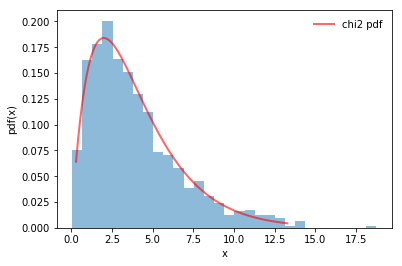

In [2]:
df = 4
# генерим выборку
r = chi2.rvs(df, size=1000)
x = np.linspace(chi2.ppf(0.01, df),
               chi2.ppf(0.99, df), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, chi2.pdf(x, df),
          'r-', lw=2, alpha=0.6, label='chi2 pdf')
ax.hist(r,bins=30, normed=True, histtype='stepfilled', alpha=0.5)
ax.legend(loc='best', frameon=False)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
plt.show()

In [3]:
# генерим выборку 1000 эл из выборочных средних
def gen_count_av(n,df=4):
    arr = list()
    for i in range(1000):
        vib = chi2.rvs(df, size=n)
        arr.append(np.mean(vib))
    return arr

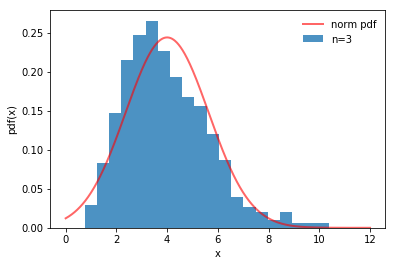

In [6]:
# далее строим для n гистограмму для выборки из 1000 выборочных средних и нормальное распред с mu, sigma
# для chi2 mu == df, variance = 2*df
n=3
mu, sigma = 4,(8/float(n))**0.5
x_norm = np.linspace(0,12, 1000)

fig, ax = plt.subplots(1, 1)
x = gen_count_av(n=n)
ax.hist(x,bins=20, normed=True, histtype='stepfilled', alpha=0.8,label= 'n='+str(n)) 
ax.plot(x_norm, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (x_norm - mu)**2 / (2 * sigma**2) ),
          'r-', lw=2, alpha=0.6, label='norm pdf')
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.legend(loc='best', frameon=False)
plt.show()

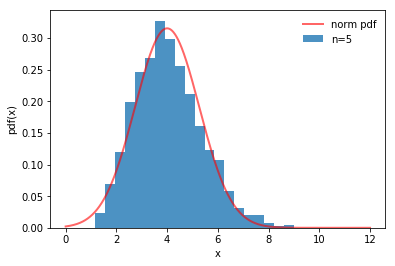

In [113]:
n=5
mu, sigma = 4,(8/float(n))**0.5
x_norm = np.linspace(0,12, 1000)

fig, ax = plt.subplots(1, 1)
x = gen_count_av(n=n)
ax.hist(x,bins=20, normed=True, histtype='stepfilled', alpha=0.8,label= 'n='+str(n)) 
ax.plot(x_norm, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (x_norm - mu)**2 / (2 * sigma**2) ),
          'r-', lw=2, alpha=0.6, label='norm pdf')
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.legend(loc='best', frameon=False)
plt.show()

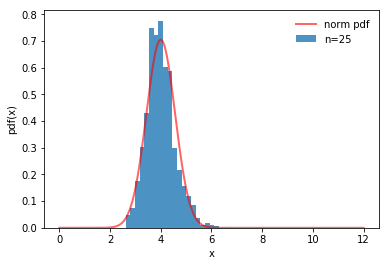

In [114]:
n=25
mu, sigma = 4,(8/float(n))**0.5
x_norm = np.linspace(0,12, 1000)

fig, ax = plt.subplots(1, 1)
x = gen_count_av(n=n)
ax.hist(x,bins=20, normed=True, histtype='stepfilled', alpha=0.8,label= 'n='+str(n)) 
ax.plot(x_norm, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (x_norm - mu)**2 / (2 * sigma**2) ),
          'r-', lw=2, alpha=0.6, label='norm pdf')
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.legend(loc='best', frameon=False)
plt.show()

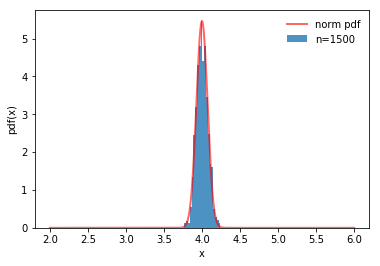

In [8]:
n=1500
mu, sigma = 4,(8/float(n))**0.5
x_norm = np.linspace(2,6, 1000)

fig, ax = plt.subplots(1, 1)
x = gen_count_av(n=n)
ax.hist(x,bins=20, normed=True, histtype='stepfilled', alpha=0.8,label= 'n='+str(n)) 
ax.plot(x_norm, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (x_norm - mu)**2 / (2 * sigma**2) ),
          'r-', lw=2, alpha=0.6, label='norm pdf')
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.legend(loc='best', frameon=False)
plt.show()

При увеличении n плотность вероятности нормального распределения все более схожа с плотн. распред. выборочных средних